# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ {\bf w_{new}} = {\bf w_{old}} - \alpha \left( \frac{2}{C}{\bf{w_{old}}} - \frac{1}{n}\sum_{i \in Batch}\left[y_{i} - <{\bf x_{i},w_{old}}> - w_0\right]{\bf{ x_{i}} }  \right) $$
$$ Batch = \{Случайные\ n\ чисел\ из \ \{1, 2,  \ldots , N\}\} $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Градиент равен разности вектора весов, деленного на параметр регуляризации и усредненной по batch'у "ошибочности объекта" - вектор признаков объекта, умноженный на разность предсказания и истинного значения.
Т. е. по сути градиент - это сжатый вектор весов минус признаки наиболее ошибочных объектов***

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ {\bf w_{new}} = {\bf w_{old}} - \alpha \left( \frac{2}{C}{\bf{w_{old}}} - \frac{1}{n}\sum_{i \in Batch}\left[y_{i} - \frac{1}{1+exp(- <{\bf x_{i}},{\bf w_{old}}> - w_0)}\right]{\bf{ x_{i}} }  \right) $$
$$ Batch = \{Случайные\ n\ чисел\ из \ \{1, 2,  \ldots , N\}\} $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Градиент по сути является ттем же самым, что и в случае линейной регрессии, но с приведением предсказания в форму "вероятности" через сигмоиду***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Гессиан функции потерь равен  $ X^TX $. Из сингулярного разложения и факта, что все сингулярные числа больше нуля (следует из полноты ранга) следует, что гессиан положительно определен. По достаточному условию минимума функции с положительным гессианом - он достигается в точке, где градиент равен нулую***

***Точное решение модели с L2 регуляризацией: $(X^TX+\lambda I)^{-1}X^TY$. 
Регуляризация оказывается полезна, так как убирает трудности в вычислениях, которые возникают, когда в расчетах учавствут числа сильно различающихся порядков ( $10^{-19} $ и $200$ ), которые возникают в ходе обращения плохо обусловленной (с собственными значениями, близкими к 0) матрицы посредством увеличения собственных значений обращаемой матрицы на $\lambda$, что делает их всех строго (даже с машинным округлением) ненулевыми. То есть создает точное решение.***

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Продифференцируем мат. ожидание по $a(x_i)$ и приравняем его к нулю:***

$$ 0 = \frac{\partial E(L|x_i)}{\partial a(x_i)} = -\frac{p(y_i=1|x_i)}{a(x_i)} + \frac{p(y_i=0|x_i)}{1 - a(x_i)} = \frac{p(y_i=0|x_i)a(x_i) - p(y_i=1|x_i)(1 - a(x_i))}{(1 - a(x_i))a(x_i)} = \{p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1\} = \frac{a(x_i) - p(y_i = 1|x_i)}{(1 - a(x_i))a(x_i)}$$

***То есть производная мат. ожидания по $a(x_i)$ достигает нуля в $p(y_i=1|x_i)$ и из ее вида очвидно, что она меньше нуля при $a(x_i) \in (0, p(y_i=1|x_i))$ и больше нуля при $a(x_i) \in (p(y_i=1|x_i), 1)$.  То есть минимум достигается в $a(x_i)$ благодаря непрерывности мат. ожидания функции потерь по  $a(x_i)$ на $(0, 1)$***

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Вес $w_0$ добавляет в модель смещение и вырожденный признак равный на всех объектах единице. Если окажется, что нулевой признак и еще какие-то признаки $x_i$ линейно зависимы - это будет означать, что линейная комбинация $x_i$ дает вырожденный признак, то есть какой-то из них неинформативен и из модели его можно удалить, поэтому L1 регуляризация может оказаться полезной. L2 же регуляризация такого эффекта не даст, а только будет излишне штрафовать модель за большое смещение, что вредно. Таким образом, L1 регуляризация применима, а L2 - нет***

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам ***не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [1]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [2]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [3]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [4]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [2]:
def batch_generator(shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    def ret_gen(X, y):
        nonlocal shuffle, batch_size
        if batch_size > X.shape[0]:
            batch_size = X.shape[0]

        if shuffle:
            index = np.arange(X.shape[0])
            np.random.shuffle(index)
            for i in range(batch_size, X.shape[0] + batch_size, batch_size):
                X_batch = X[index[i - batch_size: i]].reshape((-1, X.shape[1]))
                y_batch = y[index[i - batch_size: i]]
                yield (X_batch, y_batch)
        else:
            for i in range(batch_size, X.shape[0] + batch_size, batch_size):
                X_batch = X[i - batch_size: i, :].reshape((-1, X.shape[1]))
                y_batch = y[i - batch_size: i]
                yield (X_batch, y_batch)
    return ret_gen

In [3]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    
    sigm_value_x = 1/(np.exp(-x) + 1)
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        a = self.predict(X_batch)
        R = np.sum(self.weights**2)/self.C
        if self.model_type == 'lin_reg':
            loss = R + np.sum((y_batch - a)**2)/X_batch.shape[0]
        elif self.model_type == 'log_reg':
            loss = R - (np.sum(y_batch*np.log(a) + (1 - y_batch)*np.log(1 - a)))/X_batch.shape[0]
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        
        a = self.predict(X_batch)
        loss_grad = self.weights*2/self.C - ((y_batch - a) @ X_batch)/X_batch.shape[0]
        w0_grad = -np.sum((y_batch - a), axis=0)/X_batch.shape[0]
        return w0_grad, loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha*new_grad[1]
        self.w0 = self.w0 - self.alpha*new_grad[0]
        # print(self.weights)
        # print(self.w0, end=' ')
    
    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        
        self.weights = np.random.uniform(0, 1, X.shape[1])
        self.w0 = np.random.uniform(0, 1, (1,))[0]
        self.best_w0 = self.w0
        self.best_weights =  np.random.uniform(0, 1, X.shape[1])
        self.best_loss = 100
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                if batch_loss < self.best_loss:
                    self.best_w0 = self.w0
                    self.best_weights = self.weights.copy()
                    self.best_loss = batch_loss
                    
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Для логистической регрессии возвращает вероятность принадлежать классу 1
        '''

        if self.model_type == 'lin_reg':
            y_hat = X @ self.weights + self.w0
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(X @ self.weights + self.w0)
        return y_hat
    
    def best_predict(self, X):
        '''
        Предсказание модели
        X - матрица объекты-признаки
        Всвязи с немонотонной сходимостью метода сохраняется вектор весов,
        на котором потеря наименьшая
        Этот метод реализует предсказание на нем
        '''
        if self.model_type == 'lin_reg':
            y_hat = X @ self.best_weights + self.best_w0
        elif self.model_type == 'log_reg':
            y_hat = sigmoid(X @ self.best_weights + self.best_w0)
        return y_hat
    
    def predict_01(self, X, border = 0.5):
        '''
        Предсказание класса с границей принятия элемента за класс 1 = border
        X - матрица объекты-признаки
        '''
        if self.model_type == 'lin_reg':
            print("WARNING: Classification with regression model is incorrect")
        return np.int8(self.predict(X) > border)
    
    def best_predict_01(self, X, border = 0.5):
        '''
        Предсказание класса на лучших весах
        с границей принятия элемента за класс 1 = border
        X - матрица объекты-признаки
        '''
        if self.model_type == 'lin_reg':
            print("WARNING: Classification with regression model is incorrect")
        return np.int8(self.best_predict(X) > border)


Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [33]:
np.int8(np.array([True, False]))

array([1, 0], dtype=int8)

In [4]:
def plot_decision_boundary(clf):
    x = np.arange(0, 5)
    y = (-clf.w0-x*clf.weights[0])/clf.weights[1]
    plt.plot(x, y)

In [5]:
def plot_best_decision_boundary(clf):
    x = np.arange(0, 5)
    y = (-clf.w0-x*clf.best_weights[0])/clf.best_weights[1]
    plt.plot(x, y)

0.03678993267114414


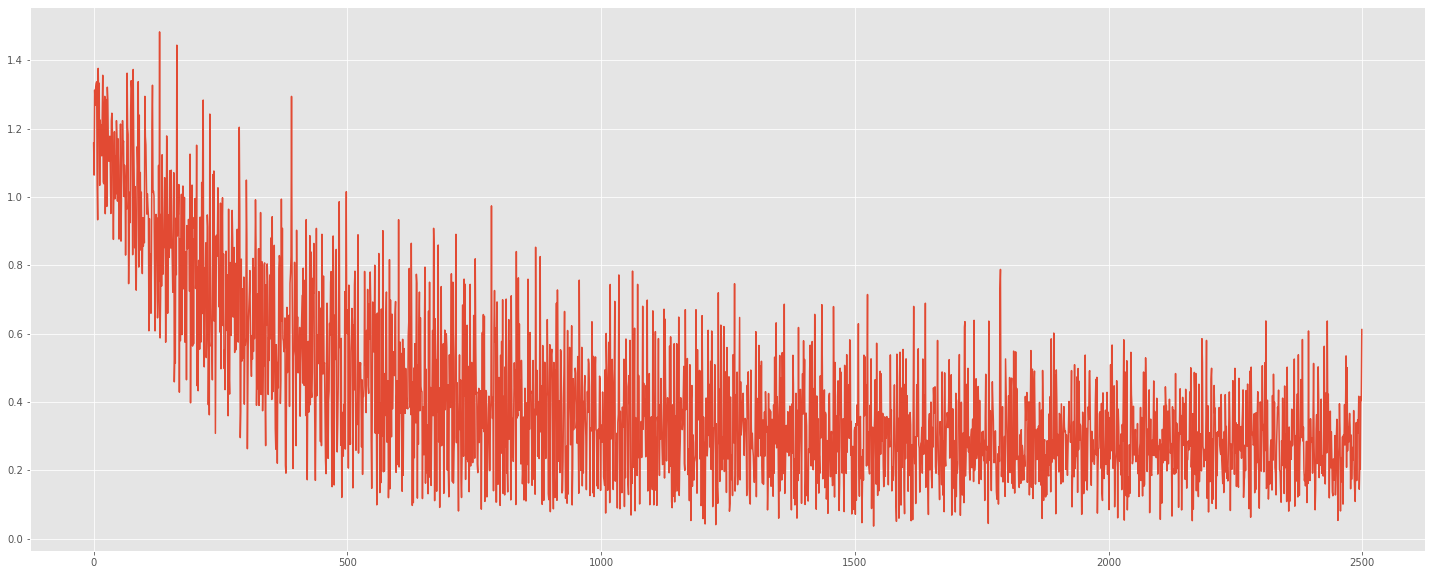

In [24]:
X = np.random.uniform(-1, 1, 100).reshape((-1, 1))


my_clf = MySGDClassifier(batch_generator(batch_size=4),
                         model_type='lin_reg', alpha=0.001, max_epoch=100).fit(X, X.ravel())
print(my_clf.best_loss)
plt.plot(my_clf.errors_log['loss'])

0.18842254651010656


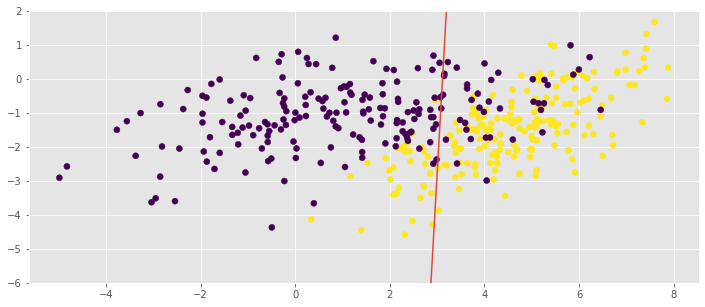

In [372]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
# C1 = np.array([[1., 1.], [2., 2.]])
# C2 = np.array([[1., 1.], [0.8, 1.]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

my_clf = MySGDClassifier(batch_generator(batch_size=1),
                         model_type='log_reg', alpha=0.01, max_epoch=10).fit(X, y)
plot_best_decision_boundary(my_clf)
print(my_clf.best_loss)
plt.ylim((-6, 2))
plt.scatter(X[:,0], X[:,1], c=y)

Лучшая встреченная поверхность

0.4915828014465954


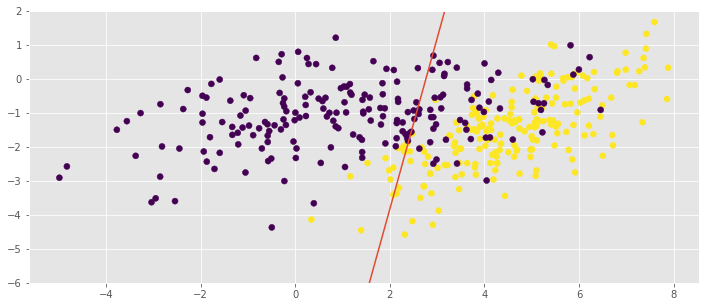

In [374]:
my_clf = MySGDClassifier(batch_generator(batch_size=1),
                         model_type='log_reg', alpha=0.01, max_epoch=10).fit(X, y)
plot_decision_boundary(my_clf)
print(my_clf.errors_log['loss'][-1])
plt.ylim((-6, 2))
plt.scatter(X[:,0], X[:,1], c=y)

Последняя встреченная поверхность

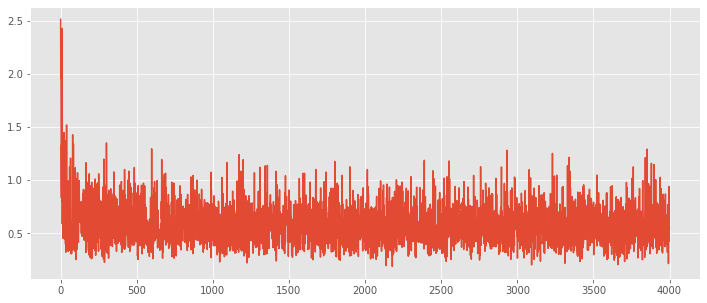

In [322]:
plt.plot(my_clf.errors_log['loss'])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [6]:
from sklearn.datasets import make_classification

In [7]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [8]:
my_clf = MySGDClassifier(batch_generator(batch_size=10), model_type='log_reg').fit(X, y)

In [9]:
my_clf_2 = MySGDClassifier(batch_generator(batch_size=10), model_type='log_reg', alpha=0.001).fit(X, y)

In [10]:
my_clf_3 = MySGDClassifier(batch_generator(batch_size=10), model_type='log_reg', alpha=0.00001).fit(X, y)

In [11]:
clfs = [my_clf, my_clf_2, my_clf_3]

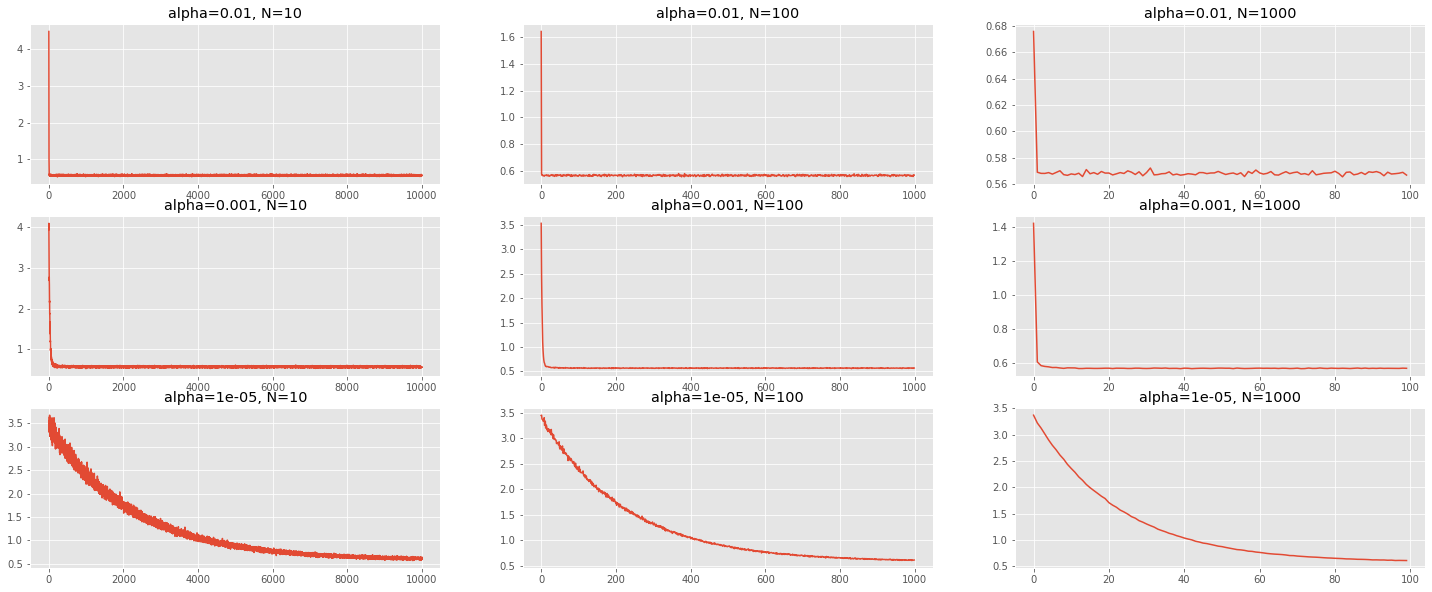

In [14]:
plt.rc('figure', figsize=(25, 10))
for i, c in enumerate(clfs):
    for j, N in enumerate([10, 100, 1000]):
        p = plt.subplot(331 + j + i*3)
        p.plot(np.sum(np.array(c.errors_log['loss']).reshape(-1, N), axis=1)/N)
        p.set_title("alpha={}, N={}".format(c.alpha, N))
plt.show()

In [15]:
my_reg = MySGDClassifier(batch_generator(batch_size=10), model_type='lin_reg').fit(X, y)

In [16]:
my_reg_2 = MySGDClassifier(batch_generator(batch_size=10), model_type='lin_reg', alpha=0.001).fit(X, y)

In [17]:
my_reg_3 = MySGDClassifier(batch_generator(batch_size=10), model_type='lin_reg', alpha=0.00001).fit(X, y)

In [18]:
regs = [my_reg, my_reg_2, my_reg_3]

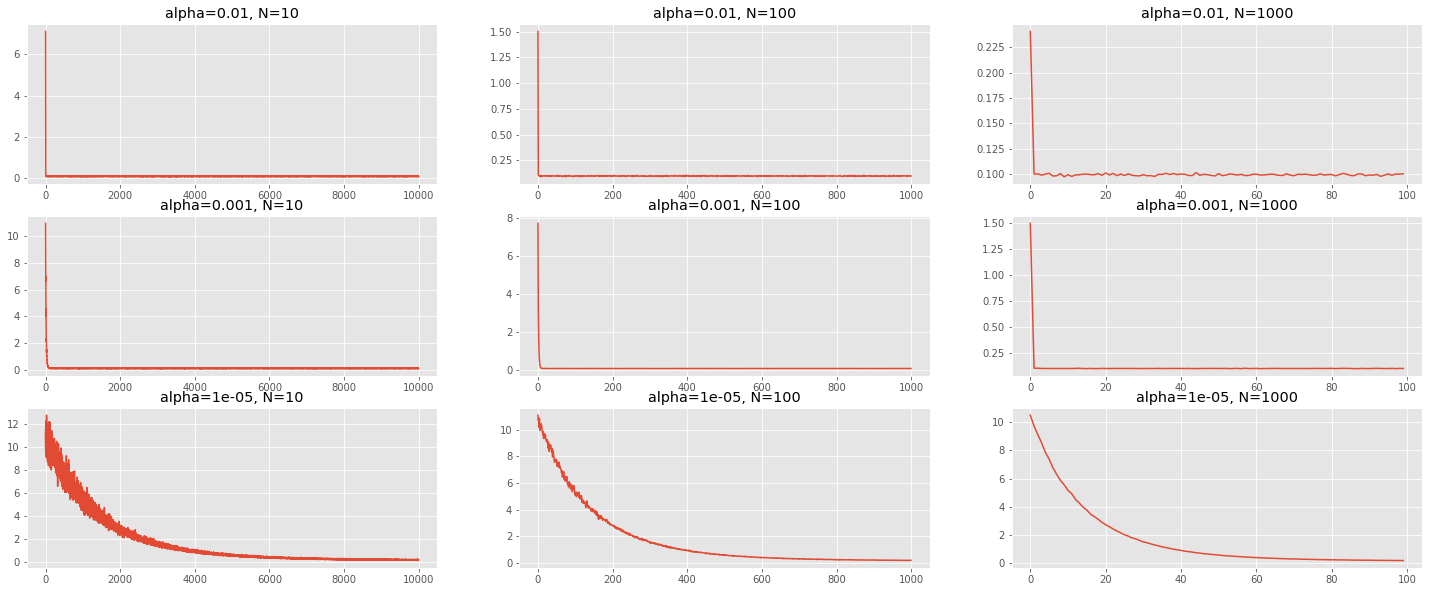

In [19]:
plt.rc('figure', figsize=(25, 10))
for i, c in enumerate(regs):
    for j, N in enumerate([10, 100, 1000]):
        p = plt.subplot(331 + j + i*3)
        p.plot(np.sum(np.array(c.errors_log['loss']).reshape(-1, N), axis=1)/N)
        p.set_title("alpha={}, N={}".format(c.alpha, N))
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [18]:
clfs = []
regs = []
for c in np.logspace(3, -3, 10):
    clfs.append(MySGDClassifier(batch_generator(batch_size=10), model_type='log_reg', C=c).fit(X, y))
    regs.append(MySGDClassifier(batch_generator(batch_size=10), model_type='lin_reg', C=c).fit(X, y))

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in square
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-pac

Text(0, 0.5, 'absolute mean of weights')

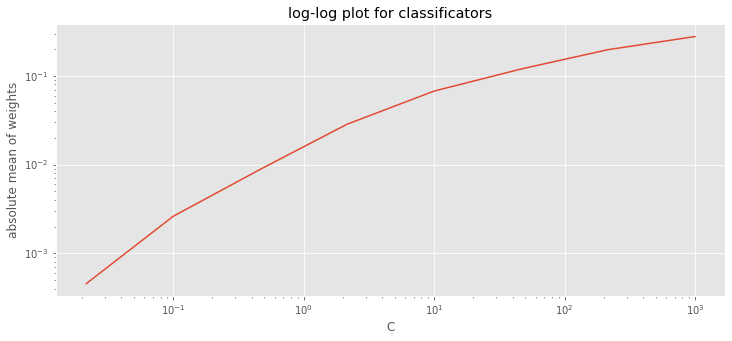

In [31]:
c_m = list(map(lambda x: -np.mean(x.weights), clfs))
p = plt.subplot(111)
p.loglog(np.logspace(3, -3, 10), c_m)
p.set_title('log-log plot for classificators')
plt.xlabel('C')
plt.ylabel('absolute mean of weights')

Text(0, 0.5, 'absolute mean of weights')

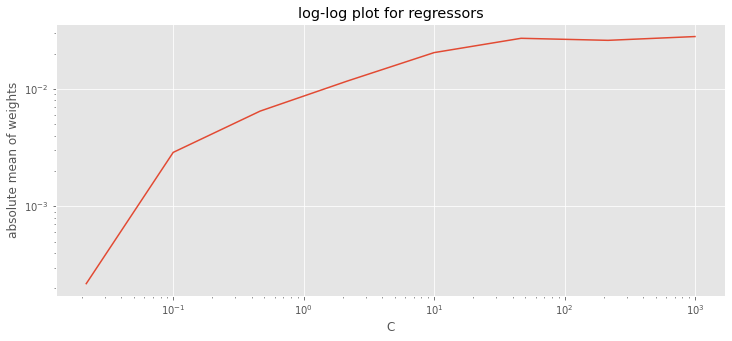

In [32]:
r_m = list(map(lambda x: -np.mean(x.weights), regs))
p = plt.subplot(111)
p.loglog(np.logspace(3, -3, 10), r_m)
p.set_title('log-log plot for regressors')
plt.xlabel('C')
plt.ylabel('absolute mean of weights')

In [16]:
%%time
c_b_1 = MySGDClassifier(batch_generator, model_type='log_reg', C=np.logspace(3, -3, 10)[3]).fit(X, y)
c_b_1.errors_log['loss'][-10:-1]

CPU times: user 1min 7s, sys: 1.61 s, total: 1min 8s
Wall time: 1min 7s


[0.16536094779037613,
 0.20691955161032838,
 0.1543354251123906,
 0.288642816149536,
 0.2467319367352663,
 0.46820615862746295,
 0.38896788792389286,
 0.3557230463367438,
 0.3617044051500282]

In [15]:
%%time
MySGDClassifier(batch_generator(batch_size=100)), model_type='log_reg', C=np.logspace(3, -3, 10)[3]).fit(X, y).errors_log['loss'][-10:-1]

CPU times: user 827 ms, sys: 7.78 ms, total: 835 ms
Wall time: 834 ms


[0.341741397072854,
 0.28969992527999866,
 0.3455261880080675,
 0.331298522005682,
 0.336085189462448,
 0.2957823167613511,
 0.3749713263668551,
 0.31210064072868937,
 0.2946830273027916]

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

Пару раз модель сломалась из-за сильной регуляризации, так что не очень

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [4]:
doc_to_title = {}
with open('../project/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [5]:
import pandas as pd
train_data = pd.read_csv('../project/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [6]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:17])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 17) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [7]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [9]:
X_tr = X_train_scaled[:int(X_train.shape[0] // 1.5)]
y_tr = y_train[:int(y_train.shape[0] // 1.5)]
X_te = X_train_scaled[int(X_train.shape[0] // 1.5):]
y_te = y_train[int(y_train.shape[0] // 1.5):]

In [10]:
X_tr.shape

(7793, 17)

In [18]:
c_scores = []
c_vals = [2**i for i in range(-5, 8)]
for i, c in enumerate(c_vals):
    lm_i = MySGDClassifier(batch_generator(batch_size=100), C=c, alpha=10**(-5), max_epoch=10, model_type='log_reg')
    lm_i.fit(X_tr, y_tr)
    c_scores.append(f1_score(lm_i.predict_01(X_te), y_te))

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered i

Text(0, 0.5, 'f1')

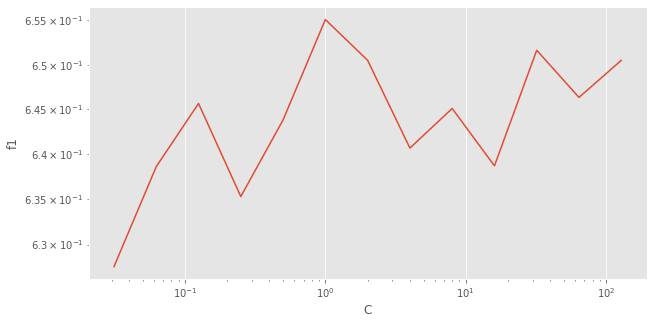

In [19]:
plt.rc('figure', figsize=(10, 5))
plt.loglog(c_vals, c_scores)
plt.xlabel('C')
plt.ylabel('f1')

In [65]:
al_scores = []
al_vals = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.00000001, 10**(-10)]
for i, al in enumerate(al_vals):
    lm_i = MySGDClassifier(batch_generator(batch_size=100), C=100, alpha=al, max_epoch=10, model_type='log_reg')
    lm_i.fit(X_tr, y_tr)
    al_scores.append(f1_score(lm_i.predict_01(X_te), y_te))

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in mul

Text(0, 0.5, 'f1')

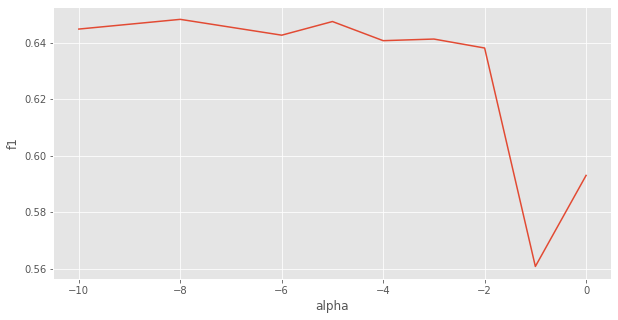

In [67]:
plt.rc('figure', figsize=(10, 5))
plt.plot(np.log(al_vals)/np.log(10), al_scores)
plt.xlabel('alpha')
plt.ylabel('f1')

In [73]:
me_scores = []
me_vals = list(range(10, 500, 50))
for i, me in enumerate(me_vals):
    lm_i = MySGDClassifier(batch_generator(batch_size=100), C=100, alpha=10**(-5), max_epoch=me, model_type='log_reg')
    lm_i.fit(X_tr, y_tr)
    me_scores.append(f1_score(lm_i.predict_01(X_te), y_te))

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in lo

Text(0, 0.5, 'f1')

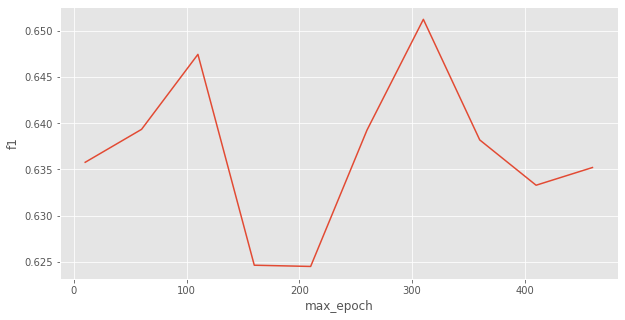

In [74]:
plt.rc('figure', figsize=(10, 5))
plt.plot(me_vals, me_scores)
plt.xlabel('max_epoch')
plt.ylabel('f1')

In [18]:
bs_scores = []
bs_vals = [1, 5, 10, 50, 100, 200, 400]
for i, bs in enumerate(bs_vals):
    lm_i = MySGDClassifier(batch_generator(batch_size=bs), C=100, alpha=10**(-5), max_epoch=100, model_type='log_reg')
    lm_i.fit(X_tr, y_tr)
    bs_scores.append(f1_score(lm_i.predict_01(X_te), y_te))

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in mul

Text(0, 0.5, 'f1')

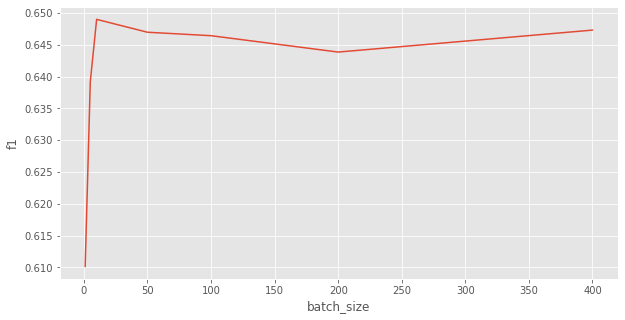

In [19]:
plt.rc('figure', figsize=(10, 5))
plt.plot(bs_vals, bs_scores)
plt.xlabel('batch_size')
plt.ylabel('f1')

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [14]:
border_te_scores = []
border_best_te_scores = []
border_tr_scores = []
border_best_tr_scores = []
border_vals = [i/100 for i in range(10, 91, 10)]
lm = MySGDClassifier(batch_generator(batch_size=10), C=100, alpha=10**(-2), max_epoch=300, model_type='log_reg')
lm.fit(X_tr, y_tr)
for border in border_vals:
    border_te_scores.append(f1_score(lm.predict_01(X_te, border=border), y_te))
    border_tr_scores.append(f1_score(lm.predict_01(X_tr, border=border), y_tr))
    border_best_te_scores.append(f1_score(lm.best_predict_01(X_te, border=border), y_te))
    border_best_tr_scores.append(f1_score(lm.best_predict_01(X_tr, border=border), y_tr))

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


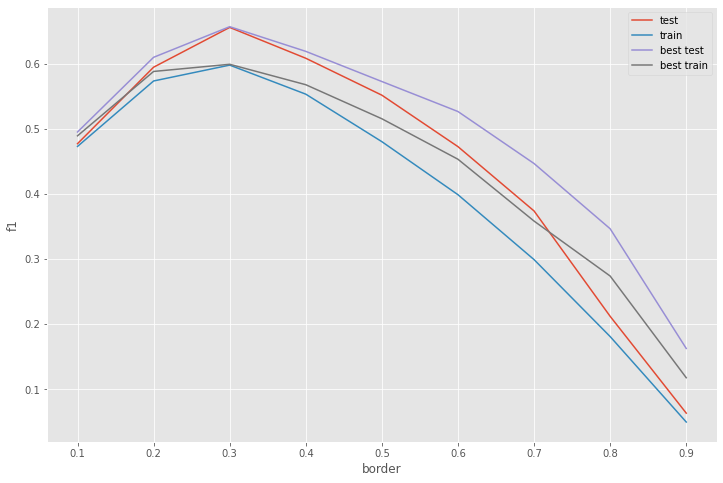

In [30]:
fig, ax = plt.subplots()
plt.rc('figure', figsize=(20, 5))
ax.plot(border_vals, border_te_scores, label="test")
ax.plot(border_vals, border_tr_scores, label="train")
ax.plot(border_vals, border_best_te_scores, label="best test")
ax.plot(border_vals, border_best_tr_scores, label="best train")
ax.legend()
plt.xlabel('border')
plt.ylabel('f1')
plt.rc('figure', figsize=(8, 12))

In [33]:
border_te_scores = []
border_best_te_scores = []
border_tr_scores = []
border_best_tr_scores = []
border_vals = [0.2 + i/100 for i in range(0, 21)]
for border in border_vals:
    border_te_scores.append(f1_score(lm.predict_01(X_te, border=border), y_te))
    border_tr_scores.append(f1_score(lm.predict_01(X_tr, border=border), y_tr))
    border_best_te_scores.append(f1_score(lm.best_predict_01(X_te, border=border), y_te))
    border_best_tr_scores.append(f1_score(lm.best_predict_01(X_tr, border=border), y_tr))

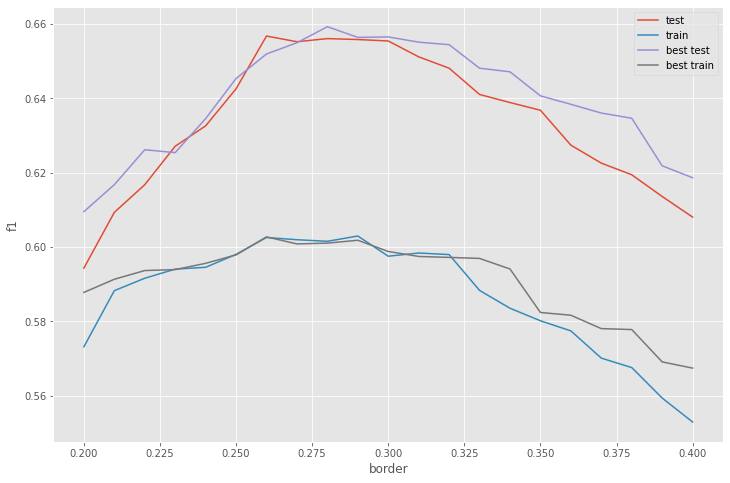

In [41]:
fig, ax = plt.subplots()
plt.rc('figure', figsize=(20, 5))
ax.plot(border_vals, border_te_scores, label="test")
ax.plot(border_vals, border_tr_scores, label="train")
ax.plot(border_vals, border_best_te_scores, label="best test")
ax.plot(border_vals, border_best_tr_scores, label="best train")
ax.legend()
plt.xlabel('border')
plt.ylabel('f1')
plt.rc('figure', figsize=(7, 5))

In [42]:
test_data = pd.read_csv('../project/test_groups.csv')
test_data.head()

,pair_id,group_id,doc_id
0,11691,130,6710
1,11692,130,4030
2,11693,130,5561
3,11694,130,4055
4,11695,130,4247


In [43]:
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [44]:
import numpy as np
n_features = 17 # optimal - 17
X_fin = []
groups_train = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        all_dist = []
        words = set(title.strip().split())
        if len(words) == 0:
            X_fin.append([0 for _ in range(n_features)])
            continue
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j))) # тут добавил /len(words)
        X_fin.append(sorted(all_dist, reverse=True)[0:n_features])
X_fin = np.array(X_fin)
groups_train = np.array(groups_train)
print (X_fin.shape, groups_train.shape)

(16627, 17) (0,)


In [45]:
best_yet = MySGDClassifier(batch_generator(batch_size=10), C=40, alpha=10**(-2), max_epoch=300, model_type='log_reg')
best_yet.fit(X_train, y_train)

/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/home/vga/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply


MySGDClassifier(C=40,
                batch_generator=<function batch_generator.<locals>.ret_gen at 0x7f49587600e0>,
                max_epoch=300, model_type='log_reg')

In [46]:
f1_score(best_yet.predict_01(X_train, border=0.28), y_train)

0.5992699571496588

In [47]:
f1_score(best_yet.best_predict_01(X_train, border=0.28), y_train)

0.6197931227285434

In [54]:
best_yet_pred = best_yet.best_predict_01(X_fin, border=0.28)

In [55]:
sample_subm = pd.read_csv('../project/sample_submission.csv')

In [56]:
sample_subm["target"] = best_yet_pred

In [57]:
sample_subm

,pair_id,target
0,11691,0
1,11692,0
2,11693,1
3,11694,1
4,11695,0
...,...,...
16622,28313,0
16623,28314,0
16624,28315,1
16625,28316,1


In [58]:
sample_subm.to_csv("second_try.csv", index=False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***